## Tensors

Basic unit of the TensorFlow API.
Equivalent to the `ndarray` in numpy.

In [4]:
import tensorflow as tf

t = tf.constant([[1.,2.,3.], [4.,5.,6.]])
print(t, t.shape, t.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32) (2, 3) <dtype: 'float32'>


In [5]:
# You can index tensors like numpy
print(t[:, 1:])
print(t[..., 1, tf.newaxis]) # equivalent to t[:, 1, tf.newaxis]

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2.]
 [5.]], shape=(2, 1), dtype=float32)


In [6]:
# Many operations are available
print(t + 10)
print(tf.square(t))
print(tf.transpose(t))

tf.Tensor(
[[11. 12. 13.]
 [14. 15. 16.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 4.]
 [2. 5.]
 [3. 6.]], shape=(3, 2), dtype=float32)


In [7]:
# Note: Tensorflow is very strict with types.
# See error below (by default floats are 32 bits):
tf.constant(2.) + tf.constant(40., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [8]:
# Variables should be used instead of constants if they have to be modified
# For example, for backpropagation which requires slowly tweaking the values
v = tf.Variable([[1.,2.,3.], [4.,5.,6.]])
print(v)
v.assign(2*v)
print(v)
v[0,1].assign(42)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>


### Other structures:
- Sparse tensors
- Tensor arrays
- Ragged tensors: List of lists of tensors
- String tensors
- Sets
- Queues

## Customizing models
### Custom loss functions

You can create a custom loss function if the default ones available are insufficient:

In [17]:
# This is an implementation of Huber loss
def custom_loss(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    # Use the tf conditional to maximize performance
    return tf.where(is_small_error, squared_loss, linear_loss)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
Tensor("compile_loss/custom_loss/ExpandDims:0", shape=(None, 1), dtype=float32) (None, 1) Tensor("sequential_10_1/dense_29_1/Add:0", shape=(None, 1), dtype=float32) (None, 1)
Tensor("compile_loss/custom_loss/strided_slice:0", shape=(1,), dtype=float32)
Tensor("compile_loss/custom_loss/ExpandDims:0", shape=(None, 1), dtype=float32) (None, 1) Tensor("sequential_10_1/dense_29_1/Add:0", shape=(None, 1), dtype=float32) (None, 1)
Tensor("compile_loss/custom_loss/strided_slice:0", shape=(1,), dtype=float32)
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0020 - loss: 0.9970Tensor("compile_loss/custom_loss/ExpandDims:0", shape=(None, 1), dtype=float32) (None, 1) Tensor("sequential_10_1/dense_29_1/Add:0", shape=(None, 1), dtype=float32) (None, 1)
Tensor("compile_loss/custom_loss/strided_slice:0", shape=(1,), dtype=float32)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0023 - loss: 0.6160 - val_accuracy: 0.0018 - val_loss: 0.2784
Epoch 2/30
332/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0023 - loss: 0.2884

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0028 - loss: 0.2634 - val_accuracy: 0.0018 - val_loss: 0.2109
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0028 - loss: 0.2078 - val_accuracy: 0.0018 - val_loss: 0.2423
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0029 - loss: 0.1882 - val_accuracy: 0.0016 - val_loss: 0.3078
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0028 - loss: 0.1805 - val_accuracy: 0.0016 - val_loss: 0.3736
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0028 - loss: 0.1753 - val_accuracy: 0.0016 - val_loss: 0.4339
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0028 - loss: 0.1726 - val_accuracy: 0.0016 - val_loss: 0.4580
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0029 - loss: 0.1707 - val_accuracy: 0.0016 - val_loss: 0.5288
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0029 - loss: 0.1682 - val_accuracy: 0.0016 - val_

<function matplotlib.pyplot.show(close=None, block=None)>

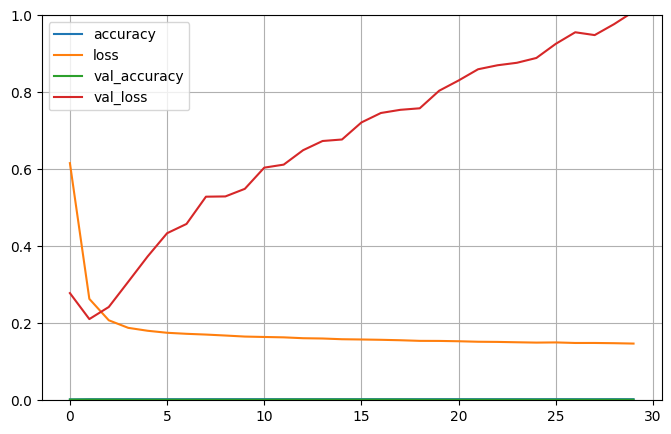

In [22]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Basic sample regression model
housing = fetch_california_housing()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1)) # Remember, no activation function for regression models

model.summary()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_with_custom_loss.h5", save_best_only=True)
# Pass the custom_loss function through the loss parameter
model.compile(loss=custom_loss, optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

print(history.history)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

### Saving models with custom components

When you save a model Keras stores the name of the custom loss function.

In [23]:

model = keras.models.load_model("my_keras_model_with_custom_loss.h5", custom_objects={"custom_loss": custom_loss})
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3 (16.00 B)

If you need a configurable loss function, or one that will change some values when saving/loading the same model you can implement the function as a class:

In [24]:
class CustomLoss(keras.losses.Loss):
    # Input parameter is the customizable attribute
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    # Override call method with the loss function
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold # Here we use the custom attribute
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    # This is what tells Keras to store the value of the attribute used to initialize the class
    def get_config(self):
        base_config = super().get_config()
        return { **base_config, "threshold": self.threshold }
    
model.compile(loss=CustomLoss(2.), optimizer="nadam")

# Save model
# as my_keras_model_with_custom_loss_class ...
# Load model
model = keras.models.load_model("my_keras_model_with_custom_loss_class.h5",
                                custom_objects={"CustomLoss": CustomLoss})

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_keras_model_with_custom_loss_class.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Other customizations

#### Activation function

In [25]:
# Equivalent to keras.activations.softplus()
def custom_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

#### Initializer

In [26]:
# Equivalent to keras.initializers.glorot_normal()
def custom_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# Can also implement via classes if parametrization is needed:
class CustomGlorot(keras.initializers.Initializer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, shape, dtype=tf.float32):
        stddev = tf.sqrt(2. / (shape[0] + shape[1]))
        return tf.random.normal(shape, stddev=stddev, dtype=dtype)
    def get_config(self):
        return { "factor": self.factor }
    

#### Regularizers

View page 387 of book

#### Constraints

View page 387 of book

#### Metrics

Can be implemented the exact same way as a custom loss function. However, there can be a need for a *streaming metric* where the metric is updated after each batch rather than only computed per batch.
Consider this example:
- Two batches of 5
- Batch 1 has 5 positives, 1 false positive --> a precision of 4/5 = 80%
- Batch 2 has 3 positives, 3 false positives --> a precision of 0/3 = 0%
- The average of the two batches is (80 + 0) / 2 = 40% , which is **wrong**
- The streaming average would be 4 false positives / 8 positives = 50% --> **correct**

In [27]:
# Can be implemented by subclassing keras.metrics.Metric

def create_huber(threshold=1.0):
    def custom_huber(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold # Here we use the custom attribute
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return custom_huber

# Using Huber loss function as an example, although this is never actually used as a real metric
class CustomHuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        # add_weight method creates the variables which can track state across batches
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("total", initializer="zeros")
    # This function is called after each batch. sample_weights can also be used if needed in the implementation, not needed here
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total/self.count
    def get_config(self):
        base_config = super().get_config()
        return { **base_config, "threshold": self.threshold }

### Custom layers

Layers which have no weights can be easily implemented as functions:

In [28]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

Conversely, stateful layers (i.e. those with weights) have to be implemented as subclasses: